In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data_raw = pd.read_csv("heart_pred.csc")
data_raw

Unnamed: 0   age  anaemia  creatinine_phosphokinase  diabetes  \
0             0  75.0        0                       582         0   
1             1  55.0        0                      7861         0   
2             2  65.0        0                       146         0   
3             3  50.0        1                       111         0   
4             4  65.0        1                       160         1   
..          ...   ...      ...                       ...       ...   
294         294  62.0        0                        61         1   
295         295  55.0        0                      1820         0   
296         296  45.0        0                      2060         1   
297         297  45.0        0                      2413         0   
298         298  50.0        0                       196         0   

     ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
0                   20                    1  265000.00               1.9   
1                   38                    0  263358.03               1.1   
2                   20                    0  162000.00               1.3   
3                   20                    0  210000.00               1.9   
4                   20                    0  327000.00               2.7   
..                 ...                  ...        ...               ...   
294                 38                    1  155000.00               1.1   
295                 38                    0  270000.00               1.2   
296                 60                    0  742000.00               0.8   
297                 38                    0  140000.00               1.4   
298                 45                    0  395000.00               1.6   

     serum_sodium  sex  smoking  time  DEATH_EVENT  
0             130    1        0     4            1  
1             136    1        0     6            1  
2             129    1        1     7            1  
3             137    1        0     7            1  
4             116    0        0     8            1  
..            ...  ...      ...   ...          ...  
294           143    1        1   270            0  
295           139    0        0   271            0  
296           138    0        0   278            0  
297           140    1        1   280            0  
298           136    1        1   285            0  

[299 rows x 14 columns]

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

In [4]:
# it is a clean data set
data_raw.describe()

Unnamed: 0         age     anaemia  creatinine_phosphokinase  \
count  299.000000  299.000000  299.000000                299.000000   
mean   149.000000   60.833893    0.431438                581.839465   
std     86.458082   11.894809    0.496107                970.287881   
min      0.000000   40.000000    0.000000                 23.000000   
25%     74.500000   51.000000    0.000000                116.500000   
50%    149.000000   60.000000    0.000000                250.000000   
75%    223.500000   70.000000    1.000000                582.000000   
max    298.000000   95.000000    1.000000               7861.000000   

         diabetes  ejection_fraction  high_blood_pressure      platelets  \
count  299.000000         299.000000           299.000000     299.000000   
mean     0.418060          38.083612             0.351171  263358.029264   
std      0.494067          11.834841             0.478136   97804.236869   
min      0.000000          14.000000             0.000000   25100.000000   
25%      0.000000          30.000000             0.000000  212500.000000   
50%      0.000000          38.000000             0.000000  262000.000000   
75%      1.000000          45.000000             1.000000  303500.000000   
max      1.000000          80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [5]:
data_raw= data_raw.drop(columns=['Unnamed: 0'])

In [6]:
data_raw.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [7]:
corr = data_raw.corr()
corr.style.background_gradient(cmap='coolwarm')

In [8]:
data_raw.loc[data_raw['DEATH_EVENT']==1].count().DEATH_EVENT

96

In [9]:
living =data_raw.loc[data_raw['DEATH_EVENT']==0]
death = data_raw.loc[data_raw['DEATH_EVENT']==1]

print('living :\n',living.head())
print("\ndead :\n ",death.head())

living :
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
14  49.0        1                        80         0                 30   
20  65.0        1                        52         0                 25   
23  53.0        0                        63         1                 60   
33  50.0        1                       159         1                 30   
38  60.0        0                      2656         1                 30   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
14                    1   427000.0               1.0           138    0   
20                    1   276000.0               1.3           137    0   
23                    0   368000.0               0.8           135    1   
33                    0   302000.0               1.2           138    0   
38                    0   305000.0               2.3           137    1   

    smoking  time  DEATH_EVENT  
14        0    12            0  
20        0    1

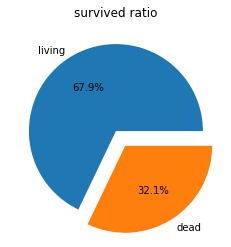

In [10]:
#data is unbalanced as we have 96 death records and 203 living records

plt.pie([living.age.count(),death.age.count()],labels=['living','dead'],autopct='%.1f%%',explode=[0,0.2])
plt.title('survived ratio')
plt.show()

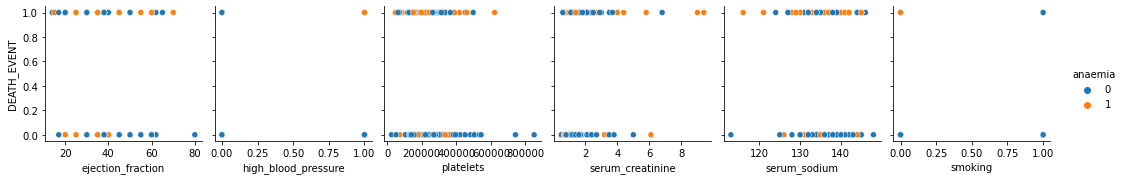

In [11]:
sns.pairplot(data_raw,x_vars=['ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium',
                             'smoking'],y_vars=['DEATH_EVENT'],hue='anaemia')
plt.show()

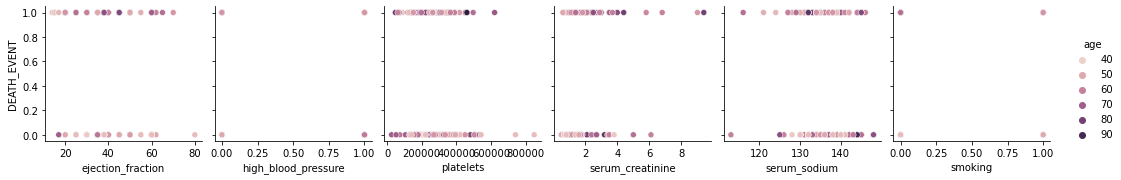

In [12]:
sns.pairplot(data_raw,x_vars=['ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium',
                             'smoking'],y_vars=['DEATH_EVENT'],hue='age')
plt.show()

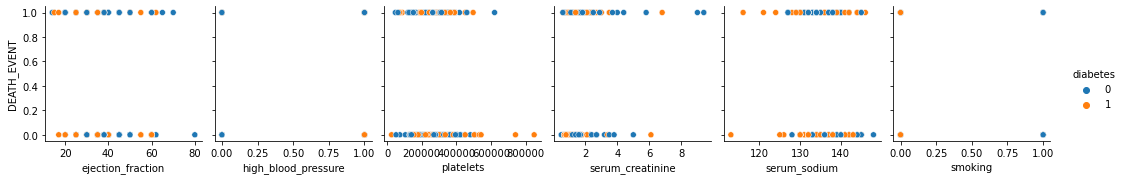

In [13]:
sns.pairplot(data_raw,x_vars=['ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium',
                             'smoking'],y_vars=['DEATH_EVENT'],hue='diabetes')
plt.show()

/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

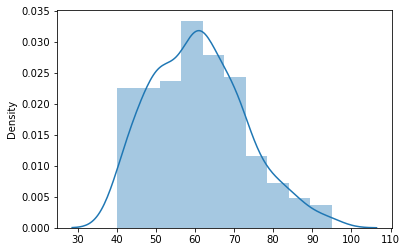

In [14]:
sns.distplot(x=data_raw.age)

/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

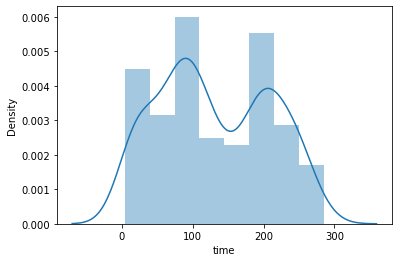

In [15]:
sns.distplot(data_raw.time)

In [16]:
age_tb=pd.pivot_table(data_raw,values=['DEATH_EVENT'],index=['age'],columns=['anaemia','ejection_fraction','serum_sodium','sex','time'],aggfunc='count')
age_tb

DEATH_EVENT                                               \
anaemia                     0                                                
ejection_fraction          14   17        20                                 
serum_sodium              127  124  136  127  129  130  134                  
sex                         1    0    1    1    1    1    1                  
time                      14   100  188  64   7    4    31   73   135  198   
age                                                                          
40.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
41.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
42.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
43.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
44.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
45.000                    1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
46.000                    NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
47.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
48.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
49.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
50.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
51.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
52.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
53.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
54.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
55.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
56.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
57.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
58.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
59.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
60.000                    NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
60.667                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
61.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
62.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
63.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
64.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
65.000                    NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN   
66.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
67.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
68.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
69.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN   
70.000                    NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN  NaN  NaN   
72.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
73.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
75.000                    NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN   
77.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
78.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
79.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
80.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
81.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
82.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
85.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
86.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
87.000                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
90.000                    NaN  NaN  NaN 

In [17]:
age_gp = data_raw.groupby('age').count()
age_gp.style.background_gradient('twilight')

In [18]:
age_gp = death.groupby('age').count()
age_gp.style.background_gradient('twilight')

<AxesSubplot:xlabel='age', ylabel='Count'>

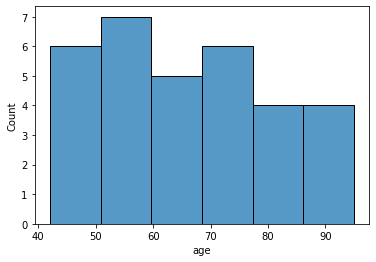

In [19]:
age = age_gp.index
age_gp['age']=age

sns.histplot(age_gp.age)

<AxesSubplot:xlabel='age'>

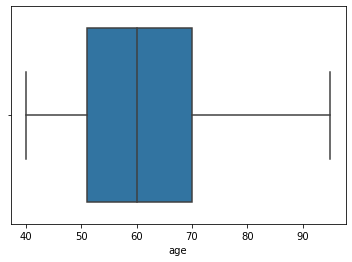

In [20]:
sns.boxplot(x=data_raw.age,data=data_raw)

In [21]:
#there are outliers
#substitute ouliers with quantiles

q1  = data_raw.age.quantile(0.25)
q3  = data_raw.age.quantile(0.75)
e   =data_raw.age.quantile(0.95)
q1,q3,e

(51.0, 70.0, 82.0)

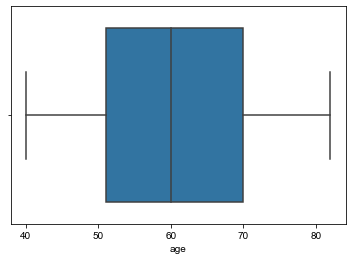

In [22]:
data_raw['age'] = np.where(data_raw['age']>e,q3,data_raw.age)

sns.boxplot(x=data_raw.age,data=data_raw)
sns.set(rc={'figure.figsize':(5,3)})

In [23]:
data_raw.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [24]:
#categorizing age
data_raw.loc[data_raw.age>30,'age_grp'] = 0

data_raw.loc[data_raw.age>40,'age_grp'] = 1

data_raw.loc[data_raw.age>50,'age_grp'] = 2

data_raw.loc[data_raw.age>60,'age_grp'] = 3

data_raw.loc[data_raw.age>70,'age_grp'] = 4

data_raw.loc[data_raw.age>80,'age_grp'] = 5

data_raw

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  age_grp  
0          0     4            1      4.0  
1          0     6            1      2.0  
2          1     7            1      3.0  
3          0     7            1      1.0  
4          0     8            1      3.0  
..       ...   ...          ...      ...  
294        1   270            0      3.0  
295        0   271            0      2.0  
296        0   278            0      1.0  
297        1   280            0      1.0  
298        1   285            0      1.0  

[299 rows x 14 columns]

In [26]:
data_raw.drop(columns=['age'],inplace=True)
data_raw.head()

anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0        0                       582         0                 20   
1        0                      7861         0                 38   
2        0                       146         0                 20   
3        1                       111         0                 20   
4        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  age_grp  
0        0     4            1      4.0  
1        0     6            1      2.0  
2        1     7            1      3.0  
3        0     7            1      1.0  
4        0     8            1      3.0

In [27]:
death = data_raw.loc[data_raw.DEATH_EVENT == 1]
new_agr = death.groupby('age_grp').count()
new_agr

anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
age_grp                                                                   
1.0           19                        19        19                 19   
2.0           25                        25        25                 25   
3.0           31                        31        31                 31   
4.0           18                        18        18                 18   
5.0            3                         3         3                  3   

         high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
age_grp                                                                        
1.0                       19         19                19            19   19   
2.0                       25         25                25            25   25   
3.0                       31         31                31            31   31   
4.0                       18         18                18            18   18   
5.0                        3          3                 3             3    3   

         smoking  time  DEATH_EVENT  
age_grp                              
1.0           19    19           19  
2.0           25    25           25  
3.0           31    31           31  
4.0           18    18           18  
5.0            3     3            3

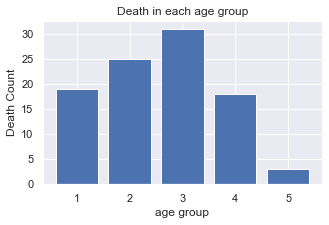

In [28]:
plt.bar(x=new_agr.index,height=new_agr.DEATH_EVENT)
plt.title('Death in each age group')
plt.xlabel('age group')
plt.ylabel('Death Count')
plt.show()

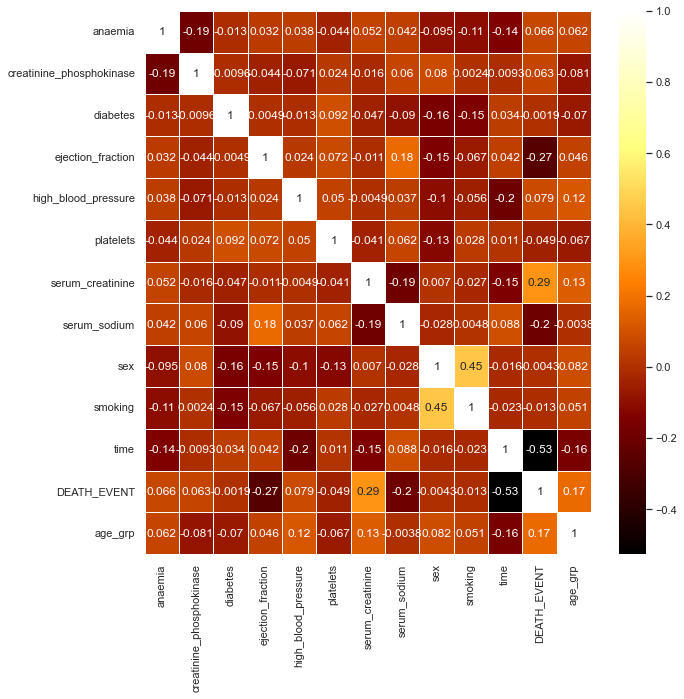

In [32]:
sns.heatmap(data_raw.corr(),cmap='afmhot',annot=True,linewidth=1)
sns.set(rc={'figure.figsize':(20,20)})

In [ ]:
# MODEL DEVOLOPMENT


In [33]:
x = data_raw.drop(columns = ['DEATH_EVENT'])
y = data_raw['DEATH_EVENT']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   anaemia                   299 non-null    int64  
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  time                      299 non-null    int64  
 11  age_grp                   299 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test 

(     anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 184        1                       145         0                 25   
 27         0                       122         1                 45   
 231        0                        93         0                 35   
 147        0                      1610         0                 60   
 2          0                       146         0                 20   
 ..       ...                       ...       ...                ...   
 52         0                      3964         1                 62   
 159        1                       129         0                 45   
 183        0                        99         0                 38   
 221        0                       118         0                 50   
 146        0                       132         0                 30   
 
      high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
 184                    0  219000.00               1.2   

In [35]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(239, 12) (60, 12) (239,) (60,)


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

def getPerformance (y_test,pred):
    print ("ACCURACY :",accuracy_score(y_test,pred))
    print ("PRECISION :",precision_score(y_test,pred))
    print ("RECALL :",recall_score(y_test,pred))
    print ("CONFUSION :",confusion_matrix(y_test,pred))
    print ("classification - report :",classification_report(y_test,pred))

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


linear_pipe = Pipeline([('scale',StandardScaler),('clf',LogisticRegression)])
param_grid = {'penalty':('l1','l2'),'C':(0.01,0.1,1.0),'solver':('liblinear','lbfgs')}
lin_grid = GridSearchCV(LogisticRegression(),param_grid,n_jobs=-1,verbose=3,cv=3)
lin_grid.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.01, 0.1, 1.0), 'penalty': ('l1', 'l2'),
                         'solver': ('liblinear', 'lbfgs')},
             verbose=3)

[CV 2/3] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END C=0.01, penalty=l2, solver=liblinear;, score=0.835 total time=   0.0s
[CV 3/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.835 total time=   0.0s
[CV 1/3] END C=0.1, penalty=l2, solver=liblinear;, score=0.850 total time=   0.0s
[CV 1/3] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.838 total time=   0.0s
[CV 2/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/3] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=1.0, penalty=l2, solver=liblinear;, score=0.850 total time=   0.0s
[CV 1/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.863 total time=   0.0s
[CV 2/3] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END C=0.0

In [39]:
lin_grid.best_estimator_

LogisticRegression(solver='liblinear')

In [40]:
lin_grid.predict(x_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
lr = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)
lr_val=lr.predict(x_test)
lr_val

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [42]:
getPerformance(y_test,lr_val)

ACCURACY : 0.8666666666666667
PRECISION : 0.8636363636363636
RECALL : 0.7916666666666666
CONFUSION : [[33  3]
 [ 5 19]]
classification - report :               precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



In [46]:
from sklearn.svm import SVC

params={'C':[0.01,0.1,1.0,10.0],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf','sigmoid'],'coef0':[0.0,0.001,0.01],'max_iter':[-1]}
state_grid = GridSearchCV(SVC(),params,refit=True,cv=3,n_jobs=-1)
state_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'coef0': [0.0, 0.001, 0.01],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid'], 'max_iter': [-1]})

In [47]:
state_grid.best_estimator_

SVC(gamma=0.001)

In [48]:
state_pred = state_grid.predict(x_test)
getPerformance(y_test,state_pred)

ACCURACY : 0.6
PRECISION : 0.0
RECALL : 0.0
CONFUSION : [[36  0]
 [24  0]]
classification - report :               precision    recall  f1-score   support

           0       0.60      1.00      0.75        36
           1       0.00      0.00      0.00        24

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lohithsowmiyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lohith

In [49]:
#not a good model as we get many false possitives

from sklearn.tree import DecisionTreeClassifier

params = {'criterion':['entropy','gini'],'splitter':['best','random'],'max_depth':[None,2,4,8,10]
         ,'max_features':['auto',0.8,0.7,0.6,0.9],'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04]}
tree_grid = GridSearchCV(DecisionTreeClassifier(),params,verbose=3,cv=10)
tree_grid.fit(x_train,y_train)

Fitting 10 folds for each of 3500 candidates, totalling 35000 fits
[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.

[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, ma

[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=entropy, 

[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_

[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_d

[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=Non

[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.542 total time=   0.0s
[CV 3/10] END criterion=entropy, max_dept

[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_featur

[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.8, min

[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None

[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max

[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_de

[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=No

[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, 

[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=6, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, 

[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features

[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_dep

[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, ma

[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=

[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.583 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_de

[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_de

[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_dep

[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_featu

[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0

[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max

[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=No

[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, 

[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_dep

[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_dep

[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0

[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0

[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=

[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max

[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_dept

[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_dept

[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, 

[CV 3/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=None, max

[CV 5/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf

[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.542 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_fea

[CV 3/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, 

[CV 7/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_featu

[CV 9/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=

[CV 4/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_f

[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_fea

[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_lea

[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_feature

[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.8, mi

[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.8, min_sa

[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.8, min_sa

[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.8, min

[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_featu

[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples

[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.7, min_sa

[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.7, min_s

[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.7, 

[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.7, min_s

[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features

[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples

[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf

[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_feature

[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features

[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_featu

[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=

[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.6, min

[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_f

[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=1, m

[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.9, min_s

[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.9, m

[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_fe

[CV 5/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.542 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_feature

[CV 7/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=0.

[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=

[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.542 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_sa

[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.565 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_fea

[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_featu

[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_fe

[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_f

[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_fea

[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_lea

[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.8, min_s

[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.

[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_feature

[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_feature

[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features

[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_feature

[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_l

[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.958 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_s

[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_feature

[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_feature

[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=

[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0

[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.7, m

[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=1, min_

[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.917 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.6, min_sa

[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.917 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.6, min_sa

[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.6, min

[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.6, m

[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0

[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.542 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.

[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=

[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.9, min_s

[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features

[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.

[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=0.9, min

[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=0.9, min_s

[CV 3/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, max_features=0.9, min_sa

[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=

[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_sampl

[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=

[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=

[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto,

[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto

[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.958 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto

[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, m

[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=

[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.8, min_sa

[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min

[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.917 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features

[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.500 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_feature

[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features

[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.8, 

[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=

[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_sa

[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.

[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.

[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.917 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.7, min_s

[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0

[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.

[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples

[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.917 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.6, min_s

[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features

[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features

[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.542 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features

[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features

[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_feature

[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_

[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.958 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.9, min_sampl

[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.9, min_s

[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.9, m

[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_f

[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.917 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_feature

[CV 9/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=0.

[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_sam

[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_s

[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_

[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, ma

[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.609 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, ma

[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_feature

[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_featur

[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=

[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.500 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=

[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features

[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.917 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10

[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_f

[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.500 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_f

[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_f

[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.917 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_f

[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samp

[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features

[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_featur

[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.7,

[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0

[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.7,

[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features

[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samp

[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_f

[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features

[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.6

[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.6,

[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_feature

[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.6,

[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_

[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.9,

[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.9

[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_feat

[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10,

[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features

[CV 4/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=0.9

[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=

[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_le

[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=au

[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.500 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=auto,

[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features

[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=auto,

[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.583 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=auto,

[CV 1/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_

[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples

[CV 8/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8,

[CV 3/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.8, min_sa

[CV 10/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.8, min

[CV 6/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=

[CV 2/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features

[CV 10/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=

[CV 5/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min

[CV 10/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.7, min

[CV 6/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features

[CV 3/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features

[CV 1/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.583 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features

[CV 8/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.03, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_feature

[CV 10/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.7, min

[CV 6/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, m

[CV 1/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.583 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=1

[CV 7/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.

[CV 4/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_feature

[CV 1/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_fe

[CV 8/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.6,

[CV 8/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.6, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.6,

[CV 7/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1,

[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=1,

[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=

[CV 7/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.9, m

[CV 3/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_sa

[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=0.9, m

[CV 7/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.609 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=0.

[CV 7/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.522 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=

[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=

[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.0

[CV 9/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples

[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=auto, min_sam

[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.0

[CV 10/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_sampl

[CV 4/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_

[CV 7/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=1, min_samples_sp

[CV 9/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.01,

[CV 1/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.02, min_

[CV 2/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_

[CV 4/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.03, min

[CV 6/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.8, min_samples_leaf=0.04, m

[CV 7/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=3,

[CV 8/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=1, min_samples_

[CV 9/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0

[CV 8/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.0

[CV 7/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03,

[CV 8/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.0

[CV 10/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.7, min_samples_leaf

[CV 4/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_

[CV 7/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min

[CV 10/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.01, m

[CV 3/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.02, min_

[CV 4/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min

[CV 6/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.03, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0

[CV 7/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.6, min_samples_leaf=0.04,

[CV 7/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=1, min_samples_split=4,

[CV 10/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=2, splitter=random;, score=0.917 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf

[CV 6/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_lea

[CV 9/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.02,

[CV 2/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.03, min_

[CV 4/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min

[CV 6/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=0.9, min_samples_leaf=0.04, m

[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.917 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples

[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.583 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.917 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_l

[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, mi

[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_sampl

[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.0

[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_lea

[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, mi

[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=1, min_samples_

[CV 2/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_lea

[CV 2/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_lea

[CV 2/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_lea

[CV 2/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_lea

[CV 1/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_lea

[CV 10/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.8, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.8, min_sample

[CV 10/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.625 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=1, min_samples_sp

[CV 10/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.917 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf

[CV 10/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf

[CV 1/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.02, min_samples_split=8, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_lea

[CV 5/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.03, min_samples_split=5, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_le

[CV 9/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.7, min_samples_leaf=0.04,

[CV 3/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=2, spli

[CV 7/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.652 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=1, min_samples_split=8,

[CV 10/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf

[CV 5/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_le

[CV 8/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=

[CV 3/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.03, min_

[CV 7/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.6, min_samples_leaf=0.04,

[CV 1/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_s

[CV 4/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=1, min_sa

[CV 9/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.01, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0

[CV 8/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.0

[CV 10/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf

[CV 2/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_lea

[CV 6/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf=0.04, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=0.9, min_samples_leaf

[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.

[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=8, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.01, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_l

[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.02, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samp

[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=3, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_l

[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.0

[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_lea

[CV 7/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=1, min_samples_split=5,

[CV 6/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, m

[CV 5/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.583 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.0

[CV 5/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.02, min

[CV 6/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.03, m

[CV 6/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, m

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.8, min_samples_leaf=0.0

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=1, min_samples_split=

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.917 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.0

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.917 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_le

[CV 10/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.500 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.02, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf

[CV 2/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.03, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_lea

[CV 4/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_le

[CV 7/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.583 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=8, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.7, min_samples_leaf

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=3, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.0

[CV 9/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.01, min_samples_split=10, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.583 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.0

[CV 2/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.542 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.02, min_

[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.03, min

[CV 8/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.0

[CV 1/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.542 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.6, min_samples_leaf=0.04, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.6, min_sampl

[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=1, min_samples_split=6, spl

[CV 3/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.01, min_

[CV 2/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.583 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=2, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_

[CV 2/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_samples_split=8, splitter=best;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.02, min_

[CV 2/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.03, min_

[CV 3/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_

[CV 4/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.04, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=0.9, min_samples_leaf=0.0

[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.583 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_sa

[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, m

[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, mi

[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_sam

[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_sample

[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, m

[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_sampl

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.542 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=1, min_s

[CV 3/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samp

[CV 3/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samp

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.8, m

[CV 5/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.8, min_sam

[CV 7/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=4, splitter=random;, score=0.696 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.8, min_samples

[CV 8/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples

[CV 6/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.542 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_sa

[CV 6/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_sampl

[CV 6/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.833 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.875 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=3, splitter=random;, score=0.783 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_sampl

[CV 7/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.02, min_samples_split=10, splitter=random;, score=0.739 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.7, min_sam

[CV 9/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=6, splitter=random;, score=0.870 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.917 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.03, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_lea

[CV 1/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.04, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=0.0

[CV 3/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=

[CV 3/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.583 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.01, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.

[CV 6/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=best;, score=0.913 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.02, min_samples_split=4, splitter=random;, score=0.708 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=

[CV 8/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.917 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_l

[CV 1/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.875 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.03, min_samples_split=8, splitter=random;, score=0.917 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.6, min_samp

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.6, min_samples_leaf=0.04, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.6, min_sam

[CV 2/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.625 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.583 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_sa

[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.826 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples

[CV 6/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.01, min_samples_split=5, splitter=random;, score=0.792 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=

[CV 5/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=3, splitter=best;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.625 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.792 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.02, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_l

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.667 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.03, min_samples_split=6, splitter=best;, score=0.708 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.

[CV 4/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.04, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=0.9, min_samples_leaf=0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'max_features': ['auto', 0.8, 0.7, 0.6, 0.9],
                         'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [50]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=0.02,
                       min_samples_split=3)

In [51]:
predict=tree_grid.predict(x_test)
predict

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [52]:
getPerformance(y_test,predict)

ACCURACY : 0.8666666666666667
PRECISION : 0.9
RECALL : 0.75
CONFUSION : [[34  2]
 [ 6 18]]
classification - report :               precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



In [53]:
# NAIVE BAYES

In [54]:
from sklearn.naive_bayes import GaussianNB

Gb = GaussianNB()
Gb.fit(x_train,y_train)
pred = Gb.predict(x_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [55]:
getPerformance(y_test,pred)

ACCURACY : 0.8
PRECISION : 0.875
RECALL : 0.5833333333333334
CONFUSION : [[34  2]
 [10 14]]
classification - report :               precision    recall  f1-score   support

           0       0.77      0.94      0.85        36
           1       0.88      0.58      0.70        24

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.78        60
weighted avg       0.81      0.80      0.79        60



In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['entropy','gini'],
          'min_samples_leaf':[1,2,4,6,8,10,20,30],
          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
          'max_depth':[None,2,4,6,8,10,20], }
Rforest = RandomizedSearchCV(RandomForestClassifier(),params,n_iter=20,cv=5, n_jobs=-1, random_state=2)
Rforest.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 20],
                                        'max_features': ['auto', 0.8, 0.7, 0.6,
                                                         0.5, 0.4],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.05, 0.1,
                                                                  0.15, 0.2],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             20, 30]},
                   random_state=2)

In [59]:
Rforest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, max_features=0.6,
                       min_samples_leaf=2)

In [60]:
pred = Rforest.predict(x_test)
getPerformance(y_test,pred)

ACCURACY : 0.8666666666666667
PRECISION : 0.8636363636363636
RECALL : 0.7916666666666666
CONFUSION : [[33  3]
 [ 5 19]]
classification - report :               precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
params = {
          'loss':['deviance','exponential'],
          'learning_rate':[0.01,0.1,1.0],
           'n_estimators':[50,100,150,200],
          'max_depth':[3,4,6,8],
}
grad_model = RandomizedSearchCV(GradientBoostingClassifier(),params,n_iter=20,cv=5,random_state=2)
grad_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 4, 6, 8],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=2)

In [66]:
grad_model.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=200)

In [67]:
pred = grad_model.predict(x_test)
getPerformance(y_test,predict)

ACCURACY : 0.8666666666666667
PRECISION : 0.9
RECALL : 0.75
CONFUSION : [[34  2]
 [ 6 18]]
classification - report :               precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



In [ ]:
 # best model so far is gradient boosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
ada = AdaBoostClassifier(n_estimators=100,random_state=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [73]:
pred = ada.predict(x_test)
getPerformance(y_test,pred)

ACCURACY : 0.8333333333333334
PRECISION : 0.7916666666666666
RECALL : 0.7916666666666666
CONFUSION : [[31  5]
 [ 5 19]]
classification - report :               precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.79      0.79      0.79        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

